In [1]:
import pandas as pd

In [4]:
#create data frame from dictionary
data = {
        'name':['Nut','Aom','John'],
        'age':[21,26,29],
        'dept':['Finance','Marketing','Engineer']
}

In [ ]:
#read csv excel and csv file

In [6]:
import pandas as pd
df = pd.read_csv("/kaggle/input/onlineretail/OnlineRetail.csv")

In [8]:
df

,invoiceno,stockcode,description,quantity,invoice_date,unitprice,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [10]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y %H:%M')

In [12]:
df['sales'] = df['quantity'] * df['unitprice'] # หากยังไม่มีคอลัมน์ Sales
df = df[df['customer_id'].notna()] 


In [13]:
df['sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: sales, Length: 406829, dtype: float64

In [23]:
df_monthly = df.groupby(pd.Grouper(key='invoice_date', freq='ME')).agg({'sales':'sum'}).reset_index()
df_monthly.columns = ['ds', 'y']


In [24]:
print(df_monthly.head())
print(df_monthly.info())

          ds           y
0 2010-12-31  554604.020
1 2011-01-31  475074.380
2 2011-02-28  436546.150
3 2011-03-31  579964.610
4 2011-04-30  426047.851
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      13 non-null     datetime64[ns]
 1   y       13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 340.0 bytes
None


In [33]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df_monthly = pd.DataFrame({
    'ds': pd.to_datetime(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
                           '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30',
                          '2011-10-31', '2011-11-30', '2011-12-31']), 
     'y': [554604.02, 475074.38, 436546.15, 579964.61, 426047.851,
          503043.94, 600570.62, 591950.84, 608151.72, 929579.59,
          1079313.36, 1146714.43, 0]})

In [38]:
m = Prophet()
m.fit(df_monthly)

08:52:35 - cmdstanpy - INFO - Chain [1] start processing
08:52:35 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
!pip install prophet

In [44]:
future = m.make_future_dataframe(periods=36, freq='ME')

In [45]:
forecast = m.predict(future)

In [46]:
print("--- Forecast Results (first 5 and last 5 rows) ---")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

--- Forecast Results (first 5 and last 5 rows) ---
          ds           yhat     yhat_lower     yhat_upper
0 2010-12-31  475339.505667  139549.366851  801589.619668
1 2011-01-31  498503.360212  136273.220729  842037.399797
2 2011-02-28  519425.551440  162240.937281  855499.728850
3 2011-03-31  542589.406033  209943.193766  884825.773171
4 2011-04-30  565006.039523  214608.761701  915514.262326
           ds          yhat    yhat_lower    yhat_upper
44 2014-08-31  1.475869e+06  1.158443e+06  1.825835e+06
45 2014-09-30  1.498285e+06  1.171136e+06  1.829709e+06
46 2014-10-31  1.521449e+06  1.181661e+06  1.882700e+06
47 2014-11-30  1.543866e+06  1.214416e+06  1.896902e+06
48 2014-12-31  1.567030e+06  1.196906e+06  1.920918e+06


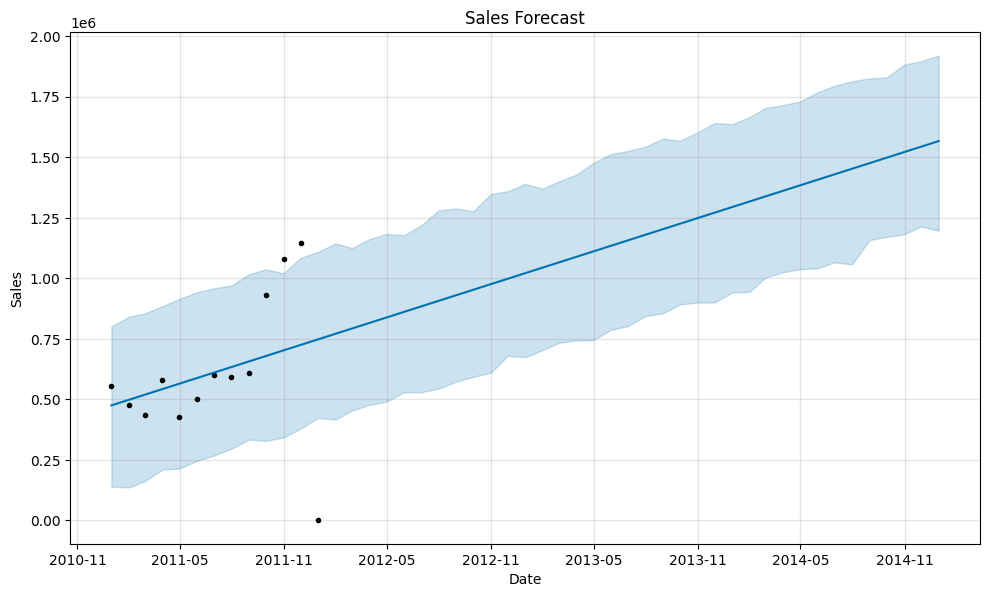

In [47]:
fig1 = m.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

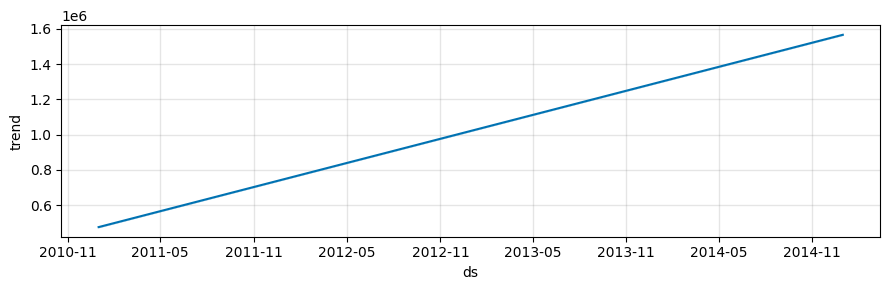

In [48]:
fig2 = m.plot_components(forecast)
plt.show()